# Dimensionality Lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gzip

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

## Download and Load the Data 

In [2]:
mnist = gzip.open('/Users/Cheddar3/Downloads/train-images-idx3-ubyte.gz','r')
image_size = 28
num_images = 60000
reshape = 784

mnist.read(16)
buf = mnist.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

## Visualize

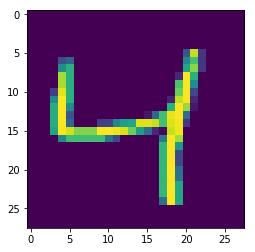

In [3]:
image = np.asarray(data[2]).squeeze()
plt.imshow(image)

## Make an instance of PCA that explains 95% of variance

In [4]:
data.shape

(60000, 28, 28, 1)

In [5]:
data.shape
data = data.reshape(num_images, reshape)

pca = PCA().fit(data)
#pca = PCA().fit(image.data)

## Reduce the dimensionality of your data

In [6]:
pca = PCA(0.95).fit(data)
pca.n_components_
projected = pca.fit_transform(data)

In [7]:
print("Original:", data.shape, "Fit:", projected.shape)

Original: (60000, 784) Fit: (60000, 154)


## Plot original image next to appropriate image

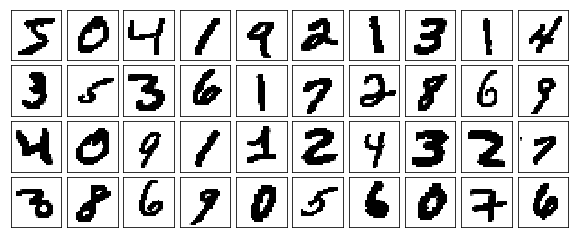

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),cmap='binary', interpolation='nearest',clim=(0, 16))
plot_digits(data)


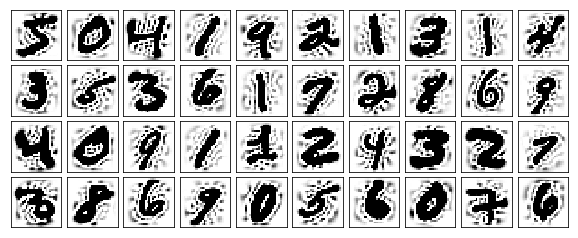

In [9]:
components = pca.transform(data)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Graph of Explained Variance Vs. Number of Principle Component

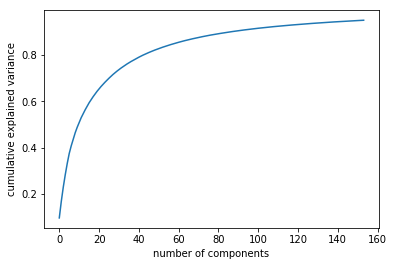

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components'); plt.ylabel('cumulative explained variance');

## Logistic Regression

In [11]:
import numpy as np 
import matplotlib.pyplot as plt


# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack

# Used for Logistic Regression
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [12]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [13]:
train_img, train_lbl = loadmnist('/Users/Cheddar3/Downloads/train-images-idx3-ubyte'
                                 , '/Users/Cheddar3/Downloads/train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('/Users/Cheddar3/Downloads/t10k-images-idx3-ubyte'
                               , '/Users/Cheddar3/Downloads/t10k-labels-idx1-ubyte')

In [14]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


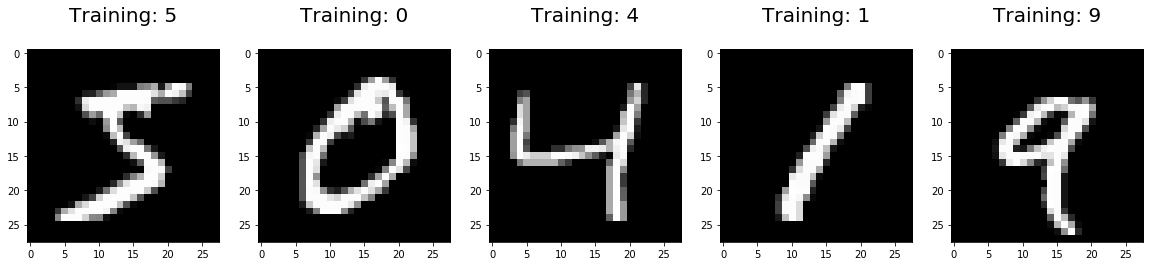

In [15]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [16]:
#creating instance of model
logisticRegr = LogisticRegression(solver = 'lbfgs')

#training model on data
logisticRegr.fit(train_img, train_lbl)

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [17]:
scores = logisticRegr.score(train_img, train_lbl)
print("Training score:", scores)

Training score: 0.9261333333333334


In [18]:
score = logisticRegr.score(test_img, test_lbl)
print("Testing score:", score)

Testing score: 0.918


When using the logistic regression function the training score was 92.61% accurate when the testing score was 91.8% accurate. The training model performs better than the testing model which makes sense. 

## Correct Logistic Regression

In [19]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
#transforms to (60000, 784) and (10000, 784)
x_train = x_train.reshape(num_images, reshape)
x_test = x_test.reshape(10000, reshape)

In [21]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [22]:
#transforms to (60000, 154) and (10000, 154)
pca = PCA(0.95).fit(x_train)
transformX_train = pca.fit_transform(x_train)

#pca = PCA(0.95).fit(x_test)
#x_test = pca.fit_transform(x_test)

transformX_test = pca.transform(x_test)


In [23]:
print(transformX_train.shape)
print(transformX_test.shape)

(60000, 154)
(10000, 154)


In [24]:
y_train = y_train == 0
y_test = y_test == 0

logisticRegr = LogisticRegression(solver = 'lbfgs')

#training model on transformed data
transformed = logisticRegr.fit(transformX_train, y_train)

pred = logisticRegr.predict(transformX_test)

scores = logisticRegr.score(transformX_test, y_test) 

#training model on regular data
transformed = logisticRegr.fit(x_train, y_train)

pred = logisticRegr.predict(x_train)

scored = logisticRegr.score(x_test, y_test) 

In [25]:
print("Transformed score:", scores)
print("Regular score: ", scored)

Transformed score: 0.9918
Regular score:  0.9922


Looking the the scores for both the transformed data and the regular data, it is easily noticeable that both of these scores are extremely high. The regular data had a slight advantage compared to the transformed data by around .0004. 

## Extra Credit

t-SNE is a machine learning algorithm for visualization developed by Laurens van der Maaten and Geoffrey Hinton. It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically it models each high-dimensional object by a two- or three- dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

## Statement of Collaboration

http://www.academia.edu/33828957/Logistic_Regression_using_Python_on_the_Digit_and_MNIST_Datasets_Sklearn_NumPy_MNIST_Matplotlib_Seaborn_
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


I worked with Matt, Tucker, and Ryan on this lab. 